In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Performing the Exploratory Data Analysis below

In [9]:
import urllib.request

#with urllib.request.urlopen("https://drive.google.com/file/d/1qKULKNfjeY3o1BkiBbV_j6k6WeLrgXQz/view") as url:
mice_data = pd.read_csv(r'D:\RESUME\ML\Mice protein\googleplaystore.csv')

https://stackoverflow.com/questions/3969726/attributeerror-module-object-has-no-attribute-urlopen  
Referred to this answer in stackoverflow to how to read directly from a link but I read it as csv file which I modified

In [10]:
mice_data.head() #printing the 1st 5 rows of the data 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
mice_data.tail() #printing the last 5 rows of the data 

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C
761,0.365605,0.599499,0.301539,2.062813,2.952577,0.248568,0.198819,3.069435,0.226736,1.220472,...,0.120182,0.121738,0.110486,0.424228,0.173689,0.166268,0.206129,1.520110,Ts65Dn,Saline_S/C


In [ ]:
mice_data.shape

(762, 79)

As we can see that there are 225 rows and 79 columns. 

In [ ]:
mice_data.describe() #The fn gives the statistical measure of the data like mean, percentile etc..

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


As we can see above, the mean and the median(50 percentile) are close to each other in every column.
Here the mean value is greater than median value, therefore it is a right(positively) skewed data. But we have to make it as Normal(no skew data) in order to correctly predict the data.
Right or left skewed data will having deficiencies in data in those regions.
But we are not bothering about skewness for this problem as it will be important when using regression models

In [ ]:
mice_data.info()    #Information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

As we can see that all the variables has Numerical Datatype except where Genotype and Treatment_Behaviour column are having object data type unlike thenumerical dtype as other columns.
So we have to convert that Label into Categorical Data using Label Encoder

In [ ]:
mice_data['Genotype'].value_counts()  # Counting the different labels in Genotype Column

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

In [ ]:
mice_data['Treatment_Behavior'].value_counts() # Counting the different labels in Treatment Behaviour Column

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

In [ ]:
#Loading the Label Encoder function
GenotypeLabel = LabelEncoder().fit_transform(mice_data.Genotype)
Treatment_BehaviorLabel = LabelEncoder().fit_transform(mice_data.Treatment_Behavior)

In [ ]:
#We are appending the Labels to the dataframe
mice_data['GenotypeLabel'] = GenotypeLabel
mice_data['Treatment_BehaviorLabel'] = Treatment_BehaviorLabel
mice_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior,GenotypeLabel,Treatment_BehaviorLabel
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S,0,0


In [ ]:
mice_data['GenotypeLabel'].value_counts() #Checking whether the Labels are correctly encoded

0    435
1    327
Name: GenotypeLabel, dtype: int64

In [ ]:
mice_data['Treatment_BehaviorLabel'].value_counts() #Checking whether the Labels are correctly encoded

0    225
1    225
2    180
3    132
Name: Treatment_BehaviorLabel, dtype: int64

In [ ]:
mice_data.drop(columns=['Genotype','Treatment_Behavior'], axis=1, inplace=True)

In [ ]:
mice_data.head() #Dataset after dropping the Oject data type columns after converting them to categorical data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,GenotypeLabel,Treatment_BehaviorLabel
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0


In [ ]:
mice_data.info

<bound method DataFrame.info of      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
..        ...       ...       ...       ...       ...       ...       ...   
757  0.394169  0.623696  0.316564  2.104045  3.314706  0.234529  0.200657   
758  0.401739  0.659571  0.321841  2.183930  3.411782  0.236546  0.190826   
759  0.382182  0.586545  0.318545  2.072000  3.073636  0.259636  0.202727   
760  0.365622  0.572209  0.297992  2.004931  2.783551  0.245333  0.190384   
761  0.365605  0.599499  0.301539  2.062813  2.952577  0.248568  0.198819   

     pCAMKII_N   pCREB_N    pELK_N  ...    

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

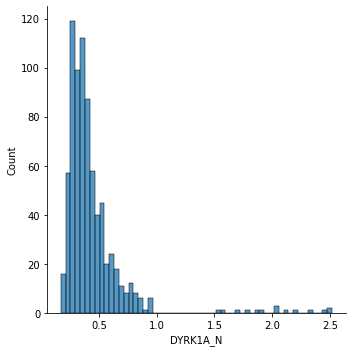

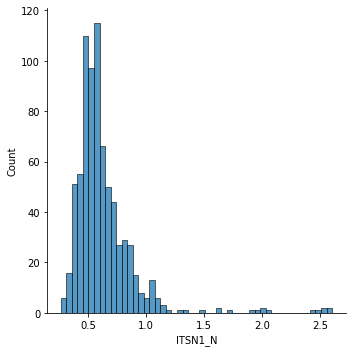

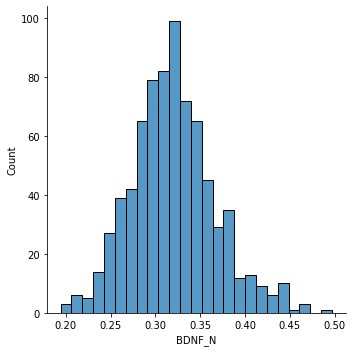

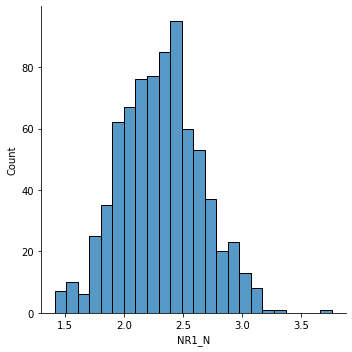

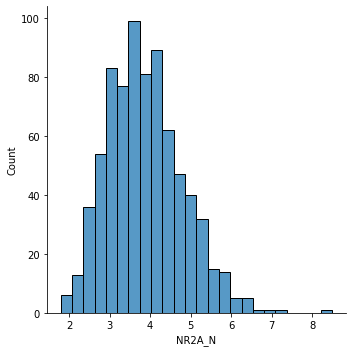

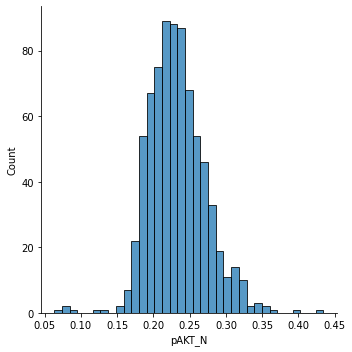

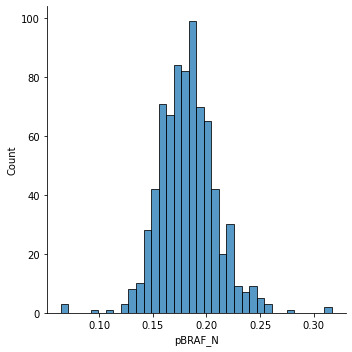

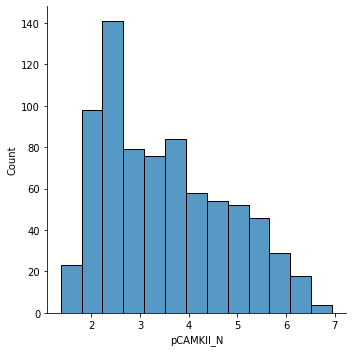

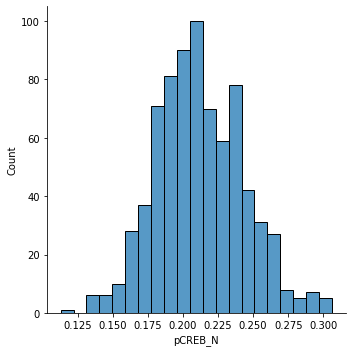

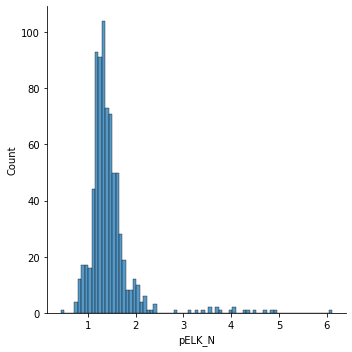

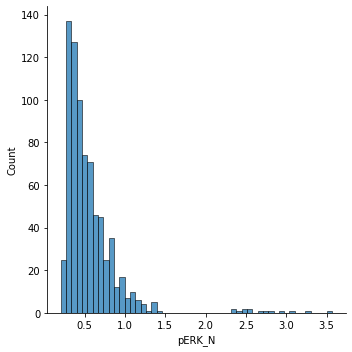

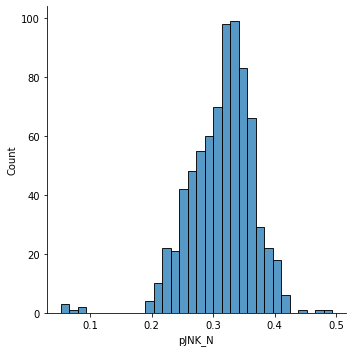

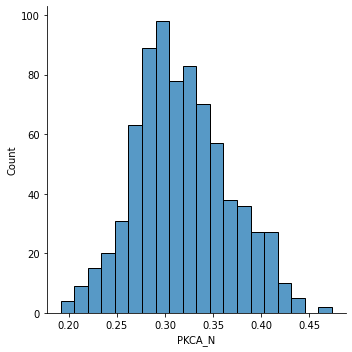

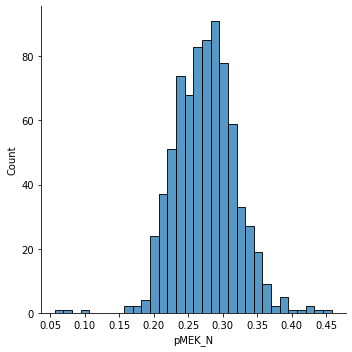

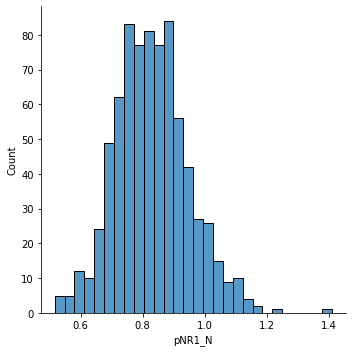

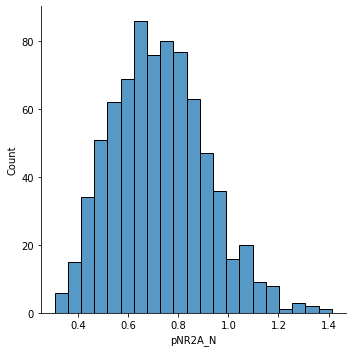

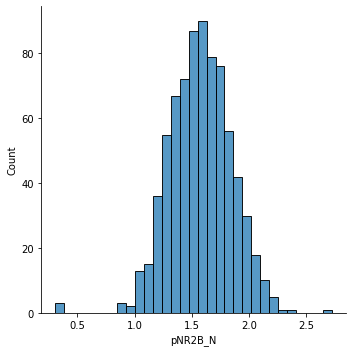

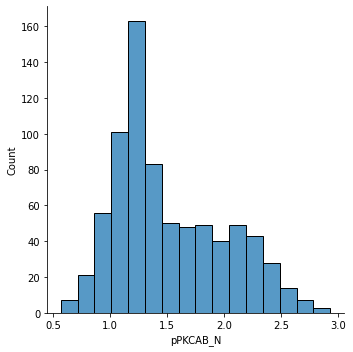

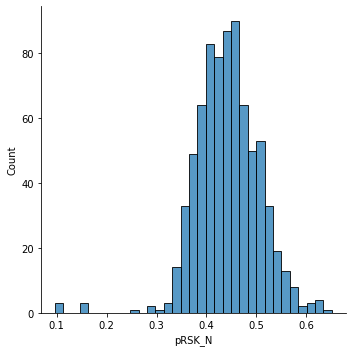

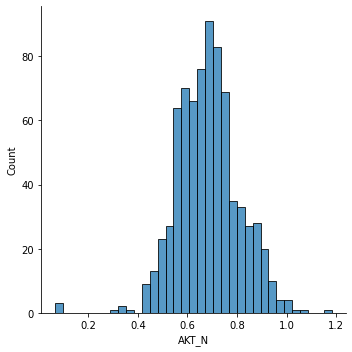

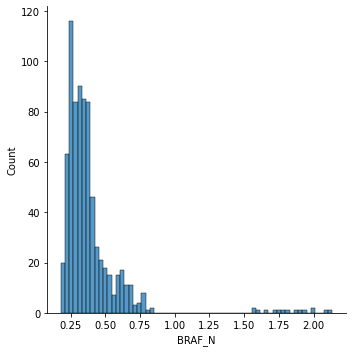

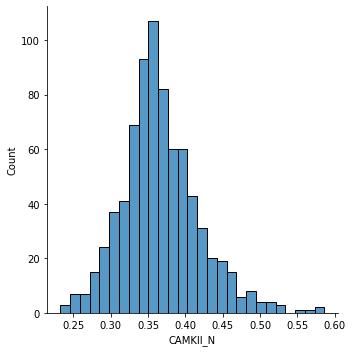

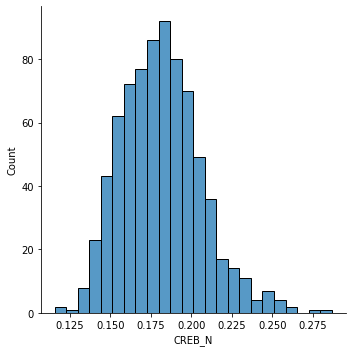

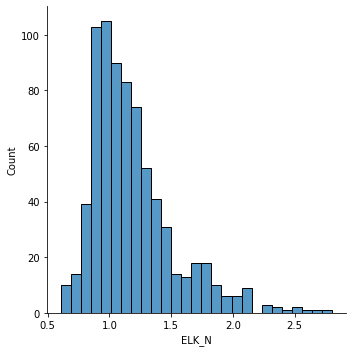

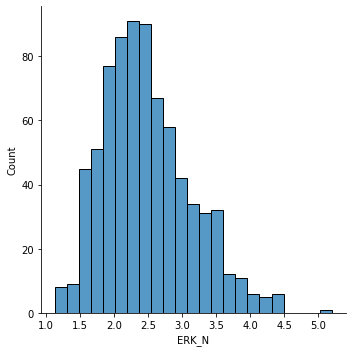

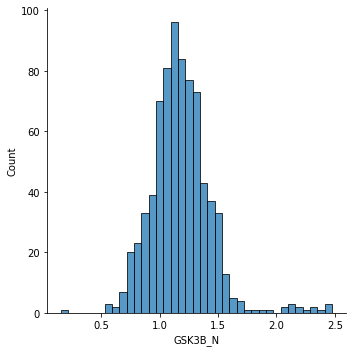

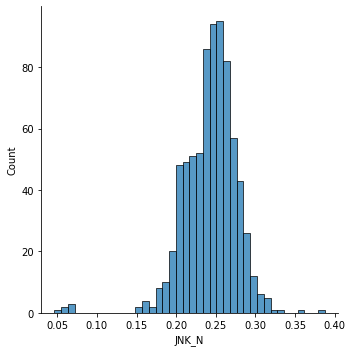

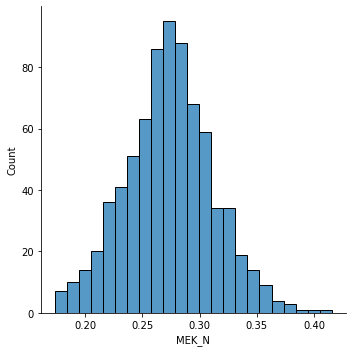

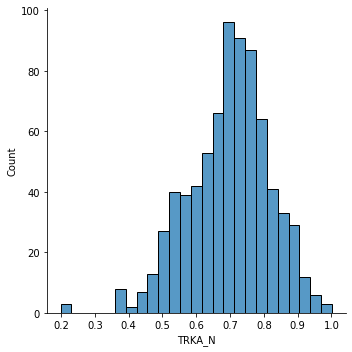

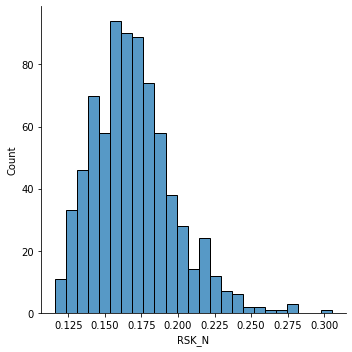

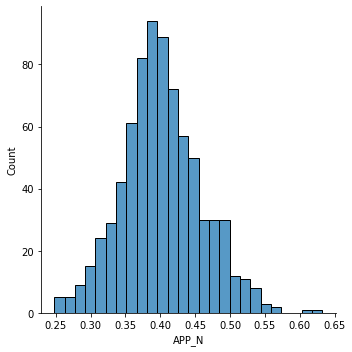

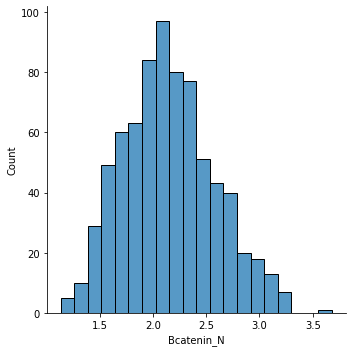

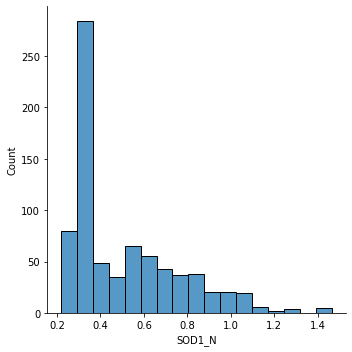

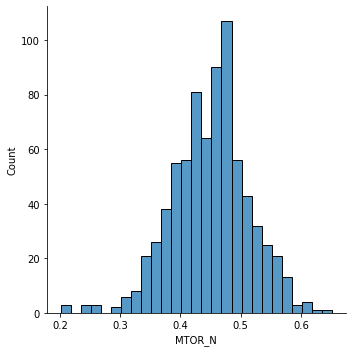

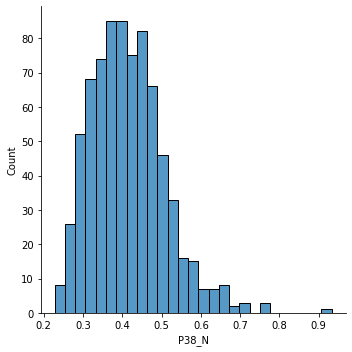

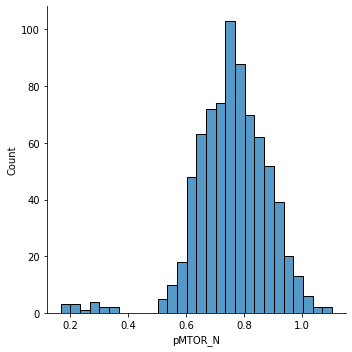

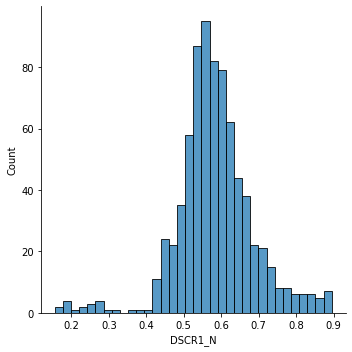

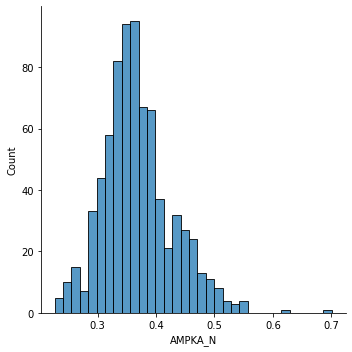

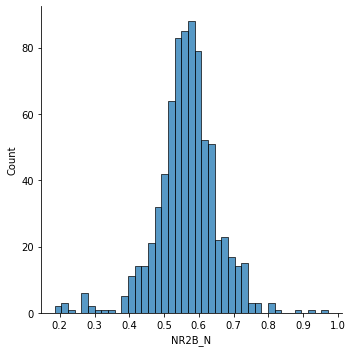

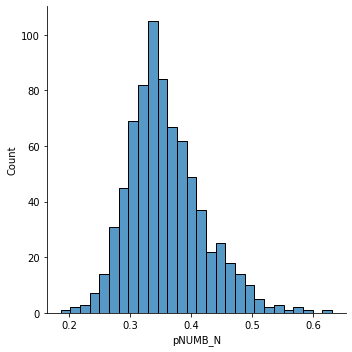

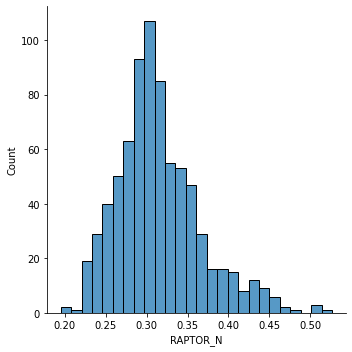

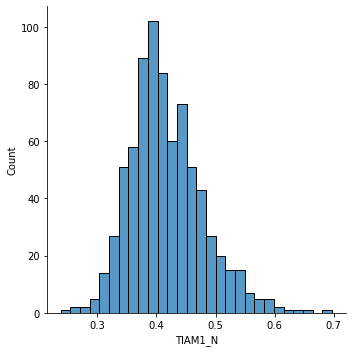

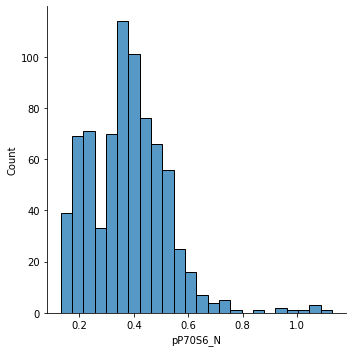

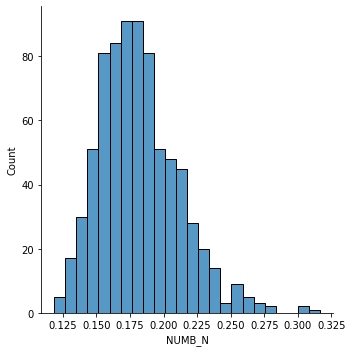

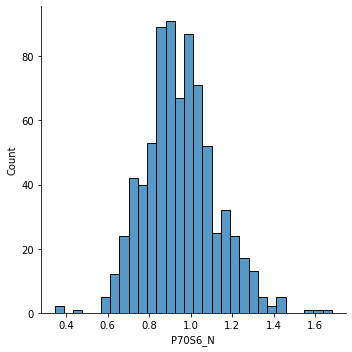

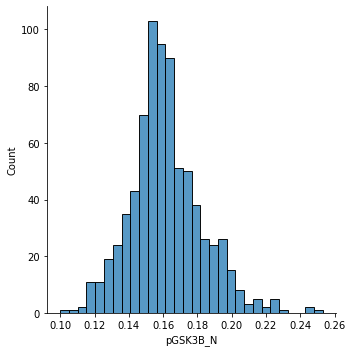

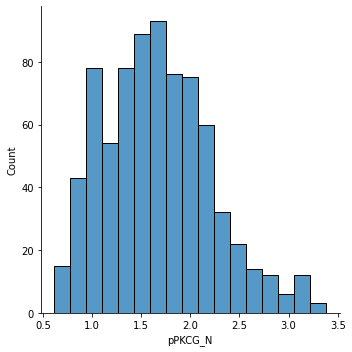

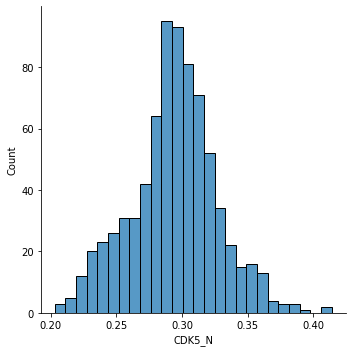

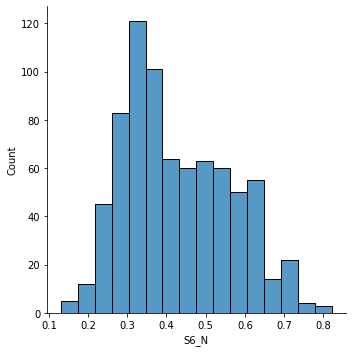

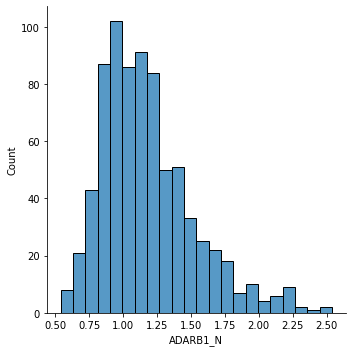

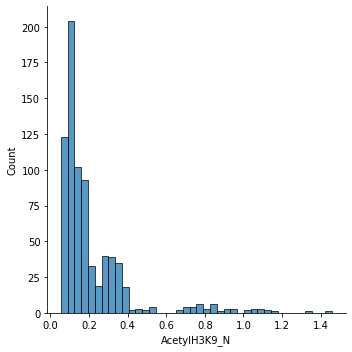

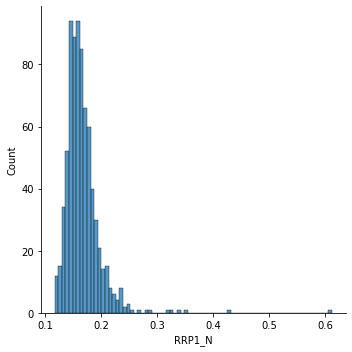

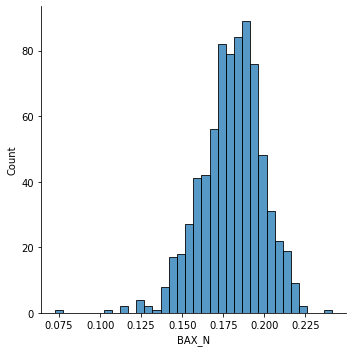

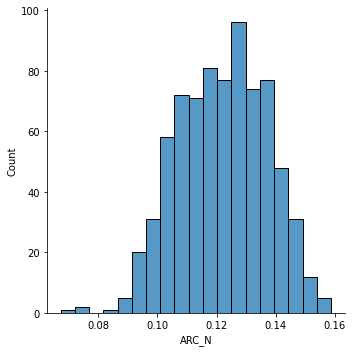

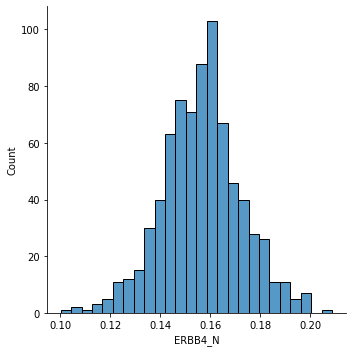

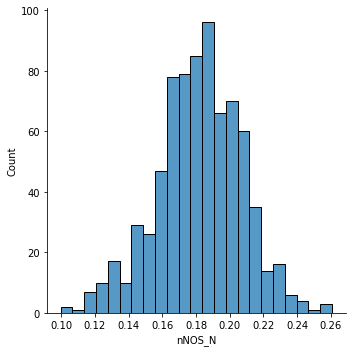

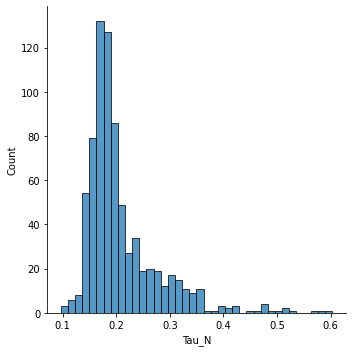

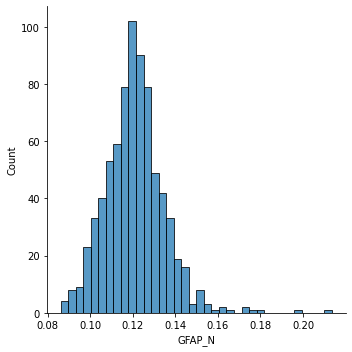

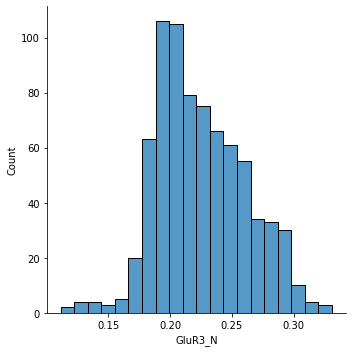

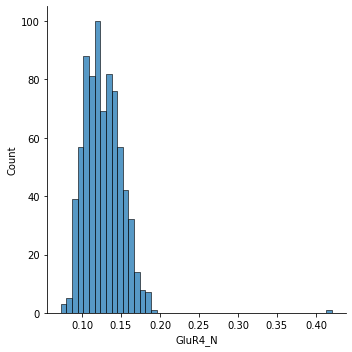

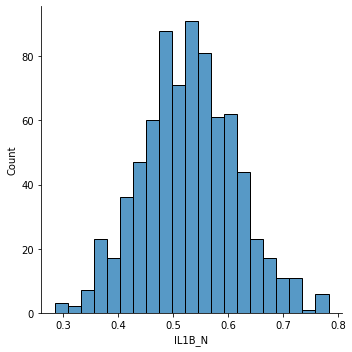

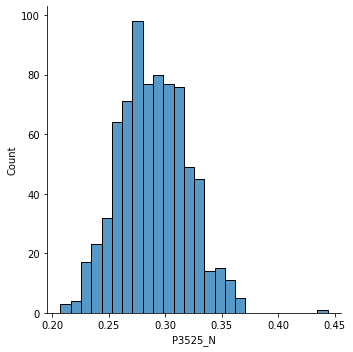

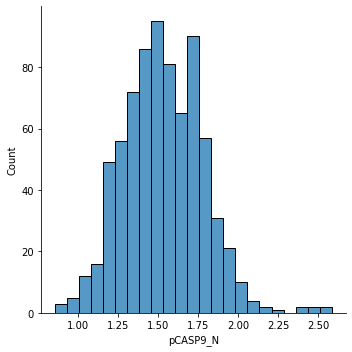

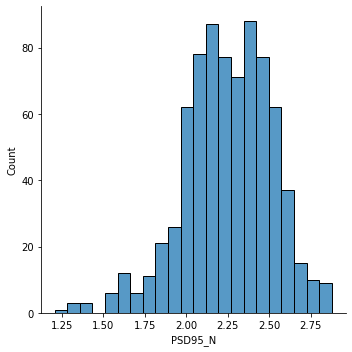

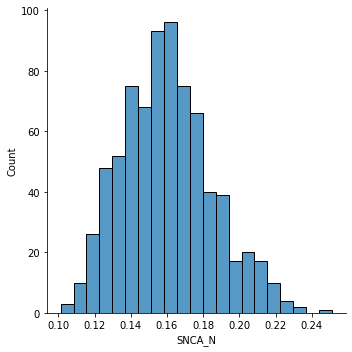

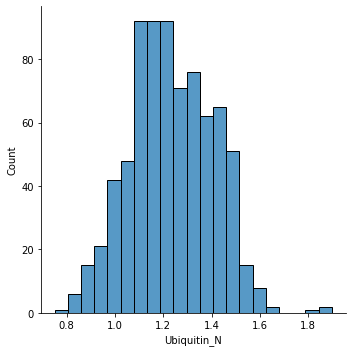

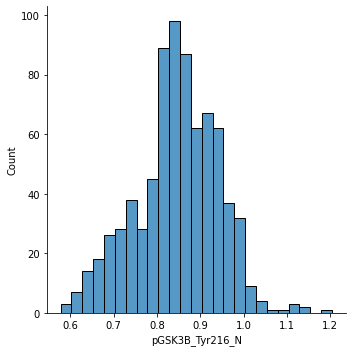

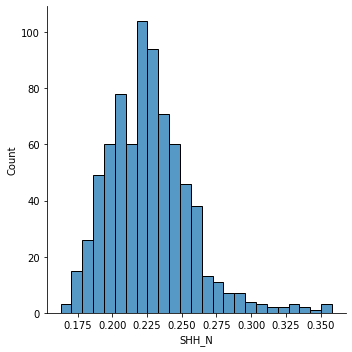

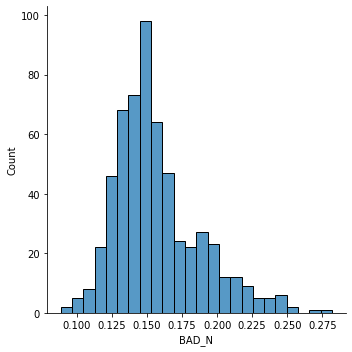

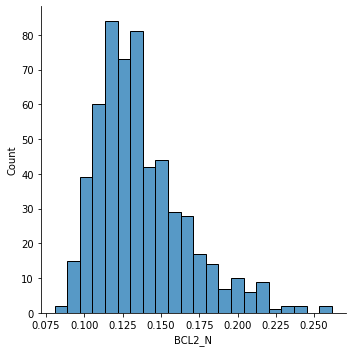

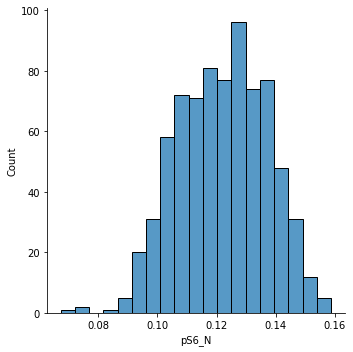

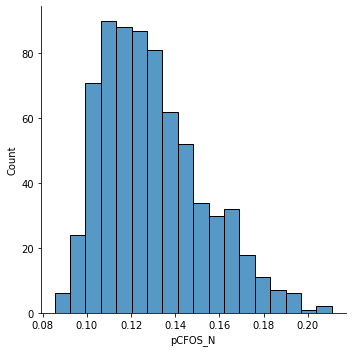

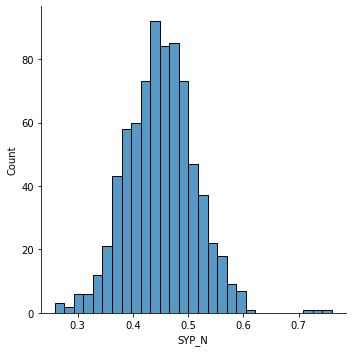

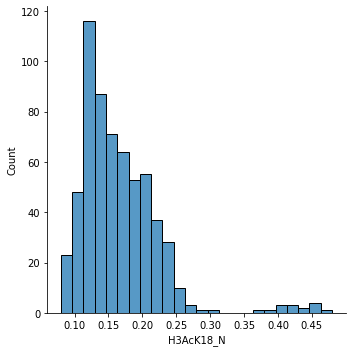

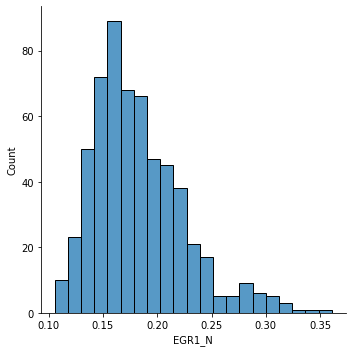

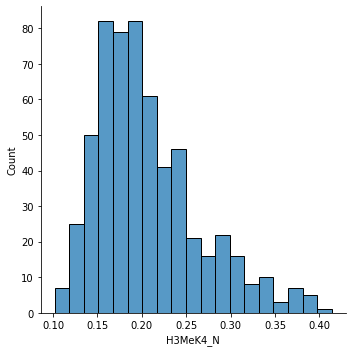

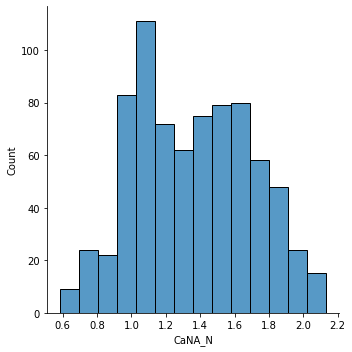

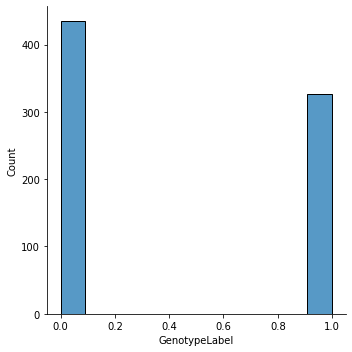

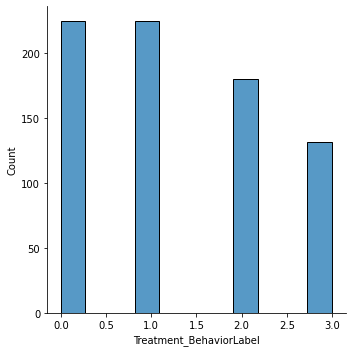

In [ ]:
for column in mice_data:
  sns.displot(x=column, data=mice_data)

We can see that all the columns has numerical data type 
And we can see from above that some columns have missing values.


So we plotted the Histograms of continous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


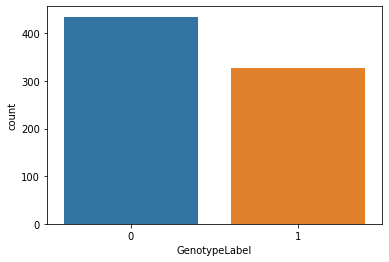

In [ ]:
sns.countplot(mice_data['GenotypeLabel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


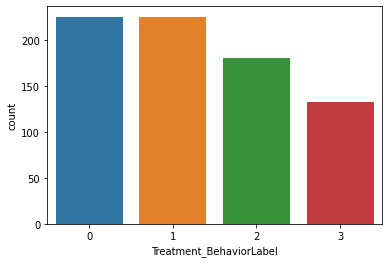

In [ ]:
sns.countplot(mice_data['Treatment_BehaviorLabel'])

We are checking the class imbalance above

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

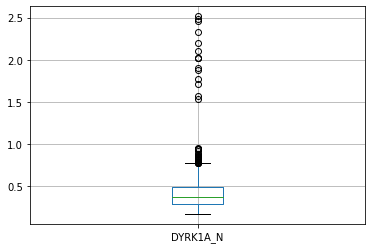

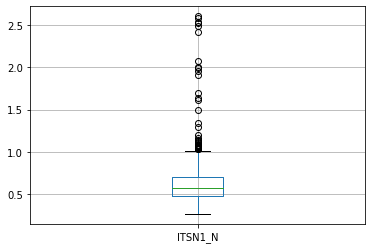

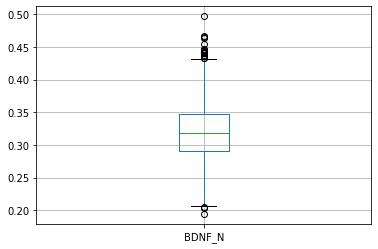

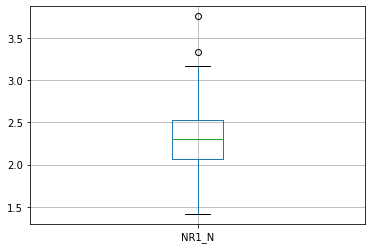

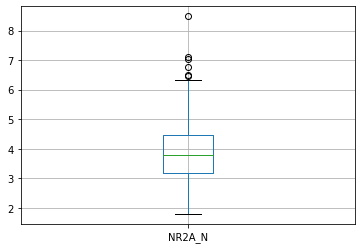

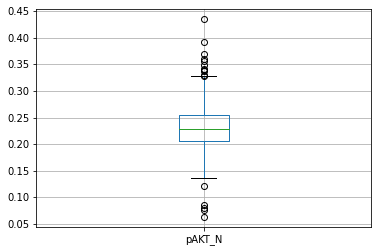

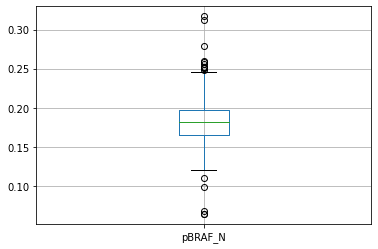

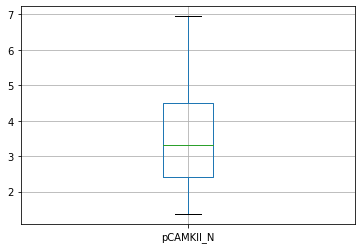

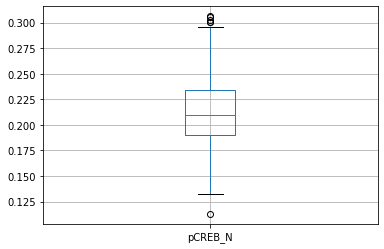

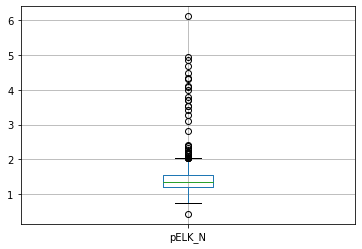

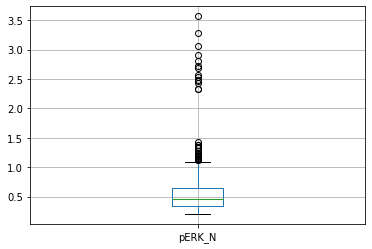

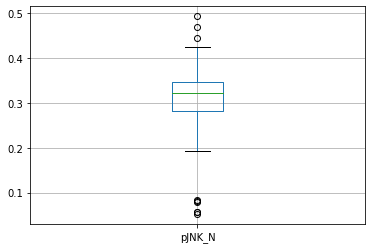

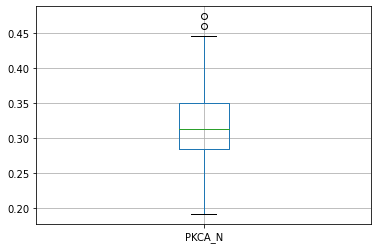

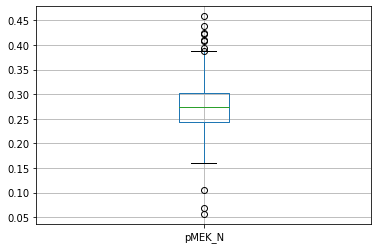

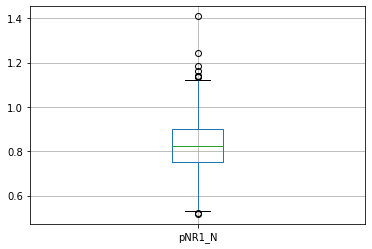

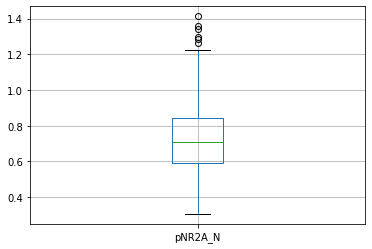

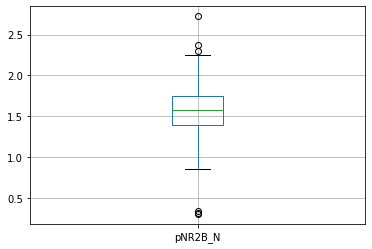

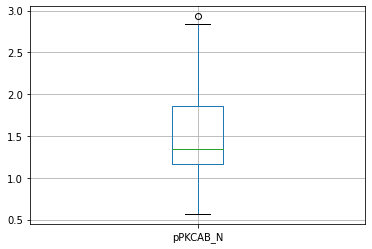

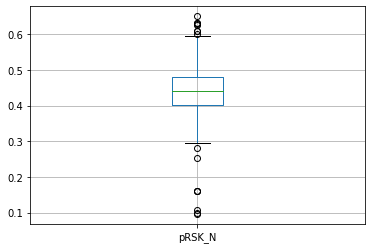

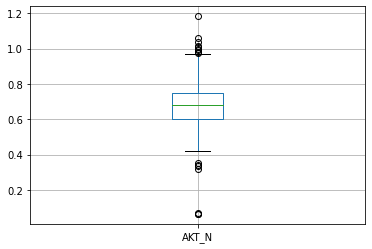

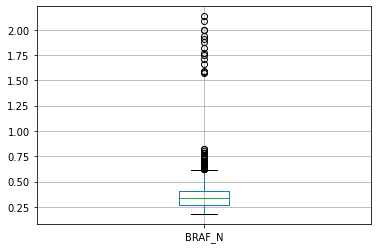

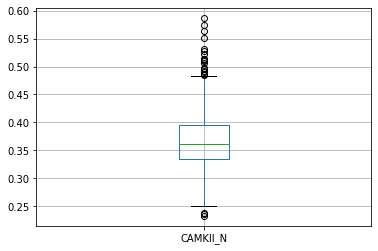

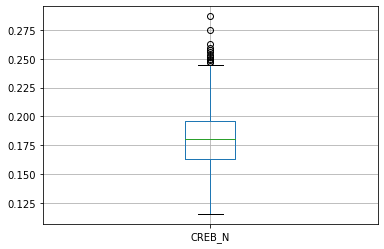

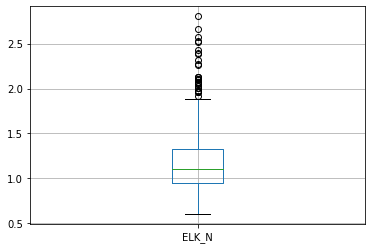

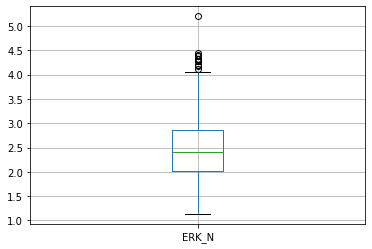

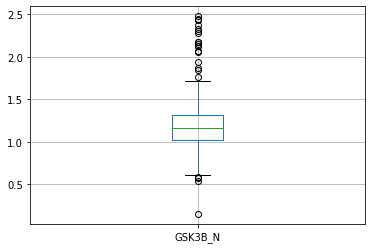

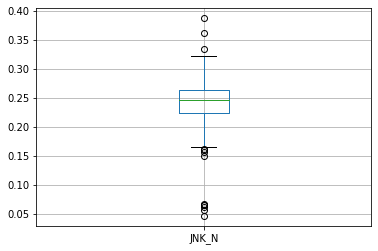

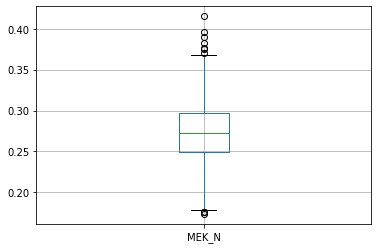

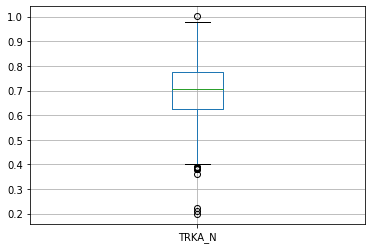

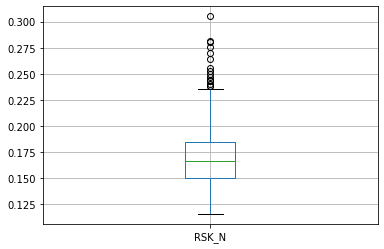

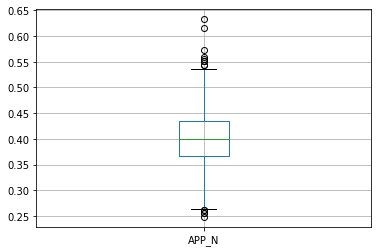

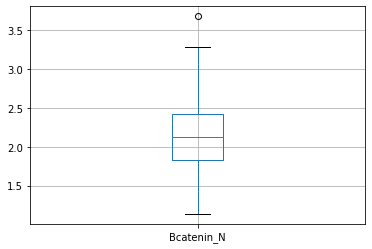

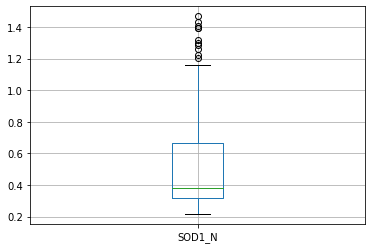

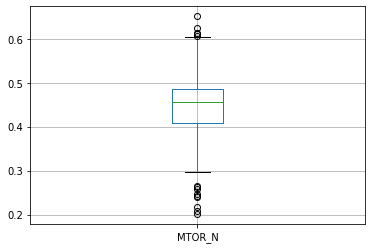

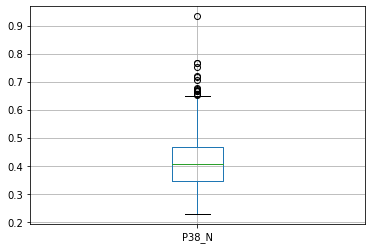

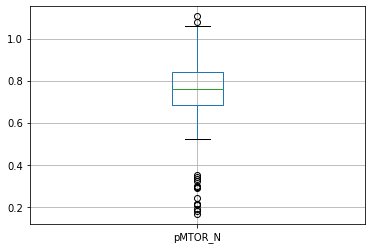

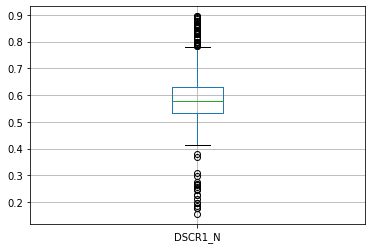

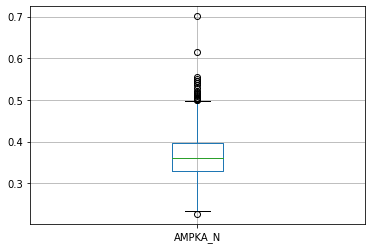

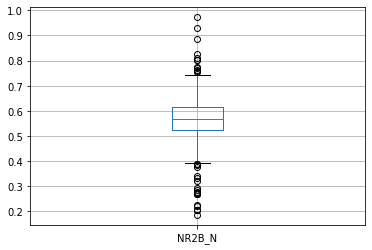

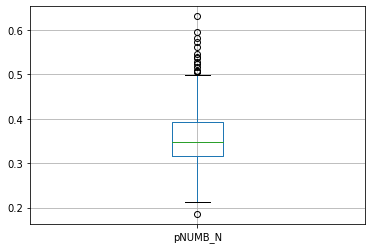

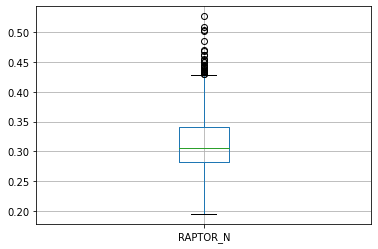

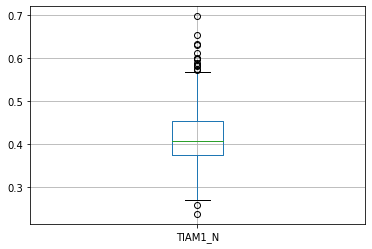

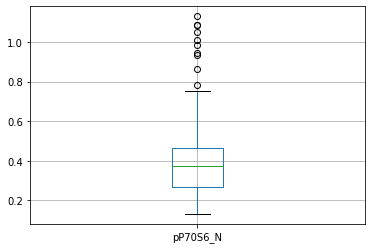

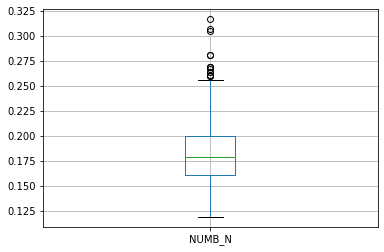

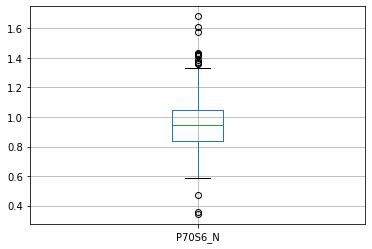

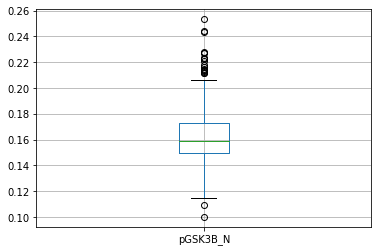

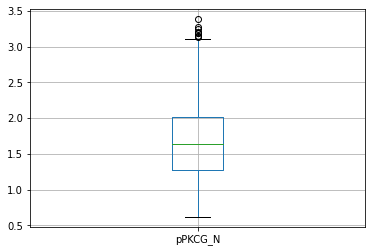

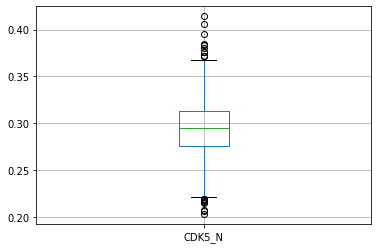

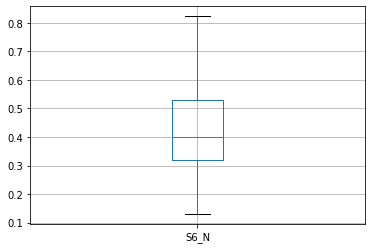

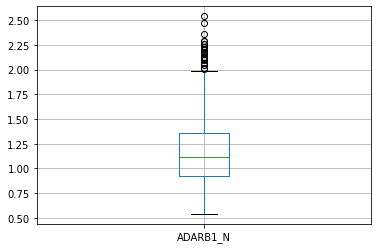

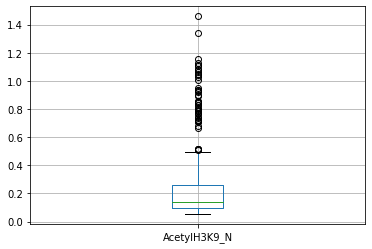

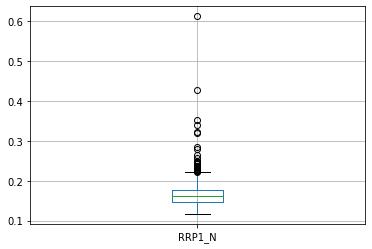

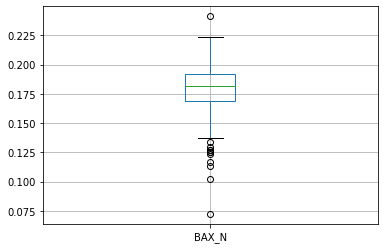

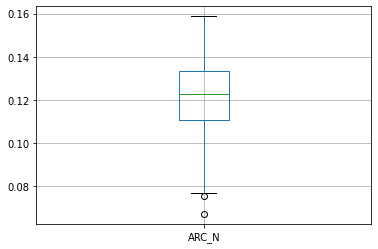

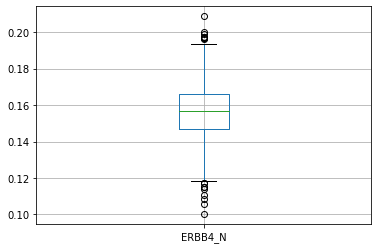

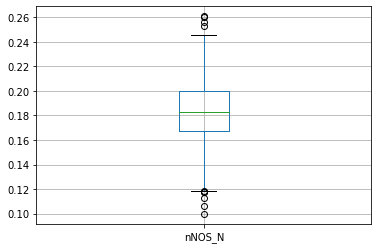

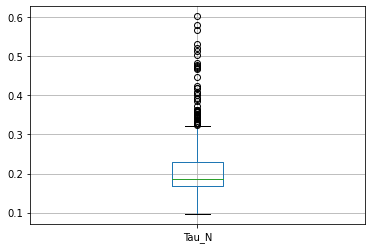

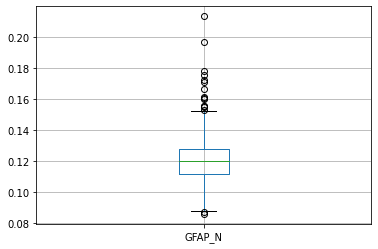

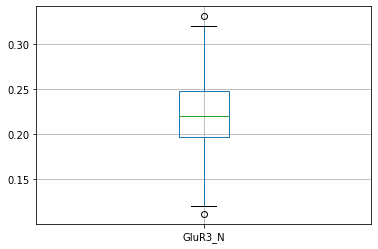

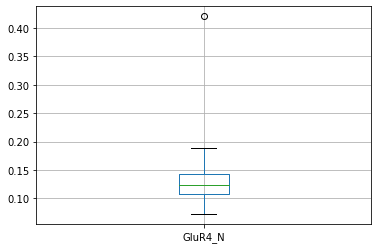

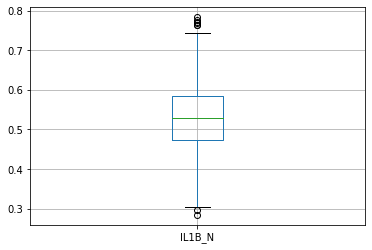

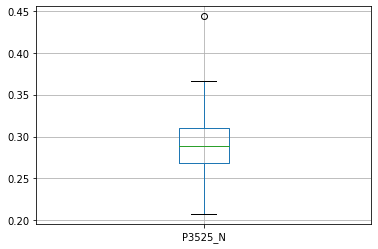

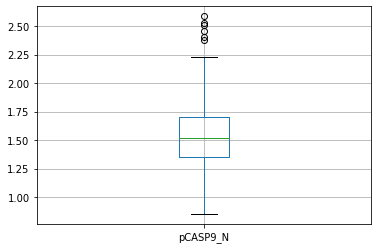

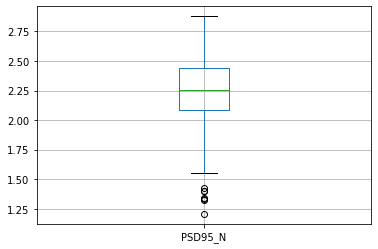

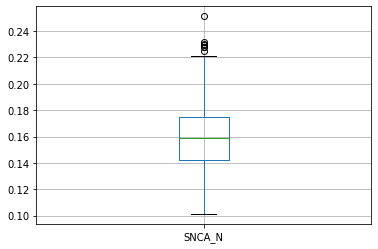

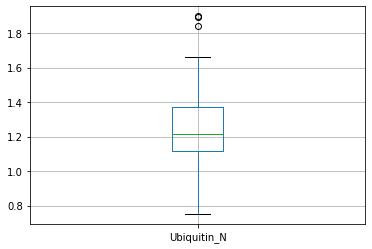

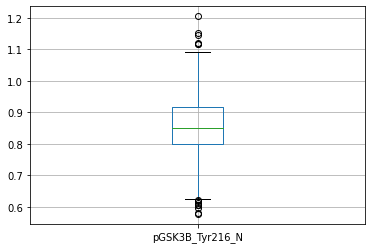

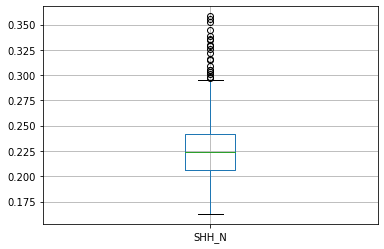

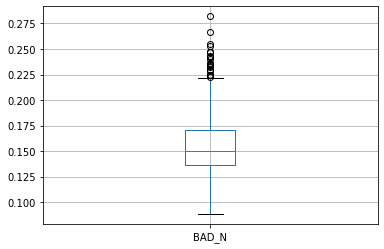

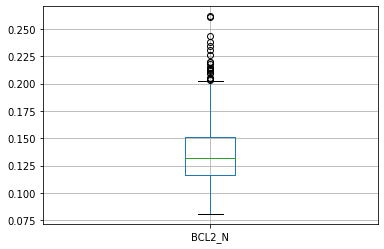

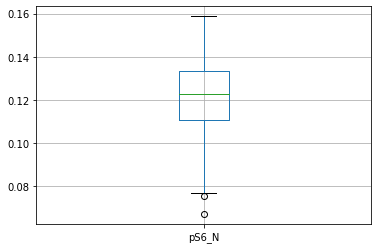

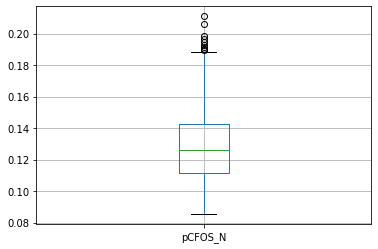

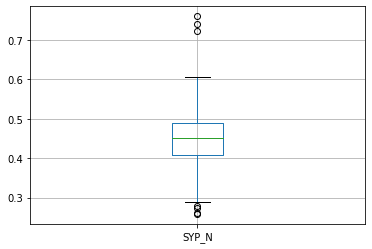

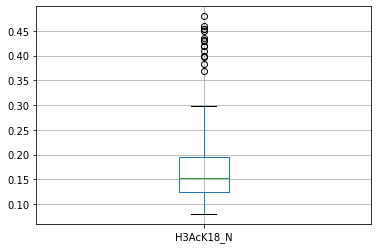

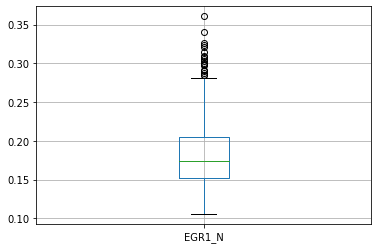

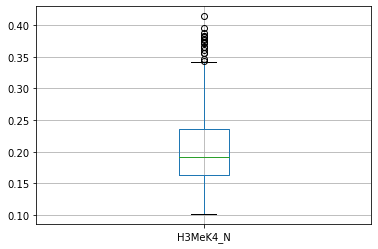

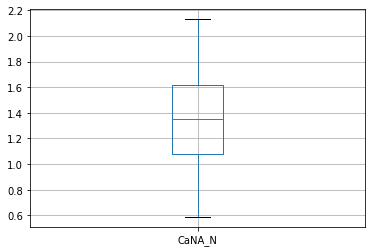

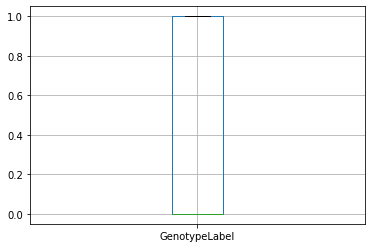

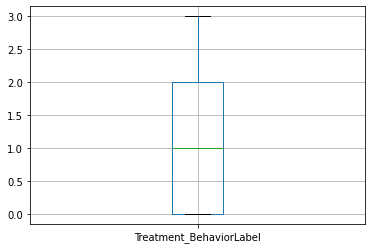

In [ ]:
for column in mice_data:
    plt.figure()
    mice_data.boxplot([column])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


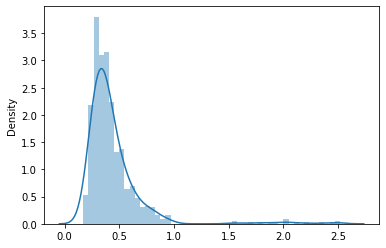

In [ ]:
sns.distplot(x=mice_data.DYRK1A_N)

In [ ]:
mice_data.isna().sum()   #Knowimg the missing values

DYRK1A_N                     0
ITSN1_N                      0
BDNF_N                       0
NR1_N                        0
NR2A_N                       0
                          ... 
EGR1_N                     180
H3MeK4_N                   180
CaNA_N                       0
GenotypeLabel                0
Treatment_BehaviorLabel      0
Length: 79, dtype: int64

In [ ]:
mice_data.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'GenotypeLabel', 'Treatment_BehaviorLabel'],
      dtype='object')

In [ ]:
cols = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'GenotypeLabel', 'Treatment_BehaviorLabel']

In [ ]:
mice_data = IterativeImputer().fit_transform(mice_data)  #Here we are using the Multivariate Imputer to fill the missing values

In [ ]:
mice_data = pd.DataFrame(mice_data, columns = cols)

In [ ]:
mice_data.isna().sum()

DYRK1A_N                   0
ITSN1_N                    0
BDNF_N                     0
NR1_N                      0
NR2A_N                     0
                          ..
EGR1_N                     0
H3MeK4_N                   0
CaNA_N                     0
GenotypeLabel              0
Treatment_BehaviorLabel    0
Length: 79, dtype: int64

As you can see that we have used the Multivariate imputer from this https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation. 
So now we can see that we are able to fill the values and there are no null values in the mice data as shown above.

*   To use the Imputer, the data should be a categorical data and should be converted if it has oject dtype which we have done in the above process.




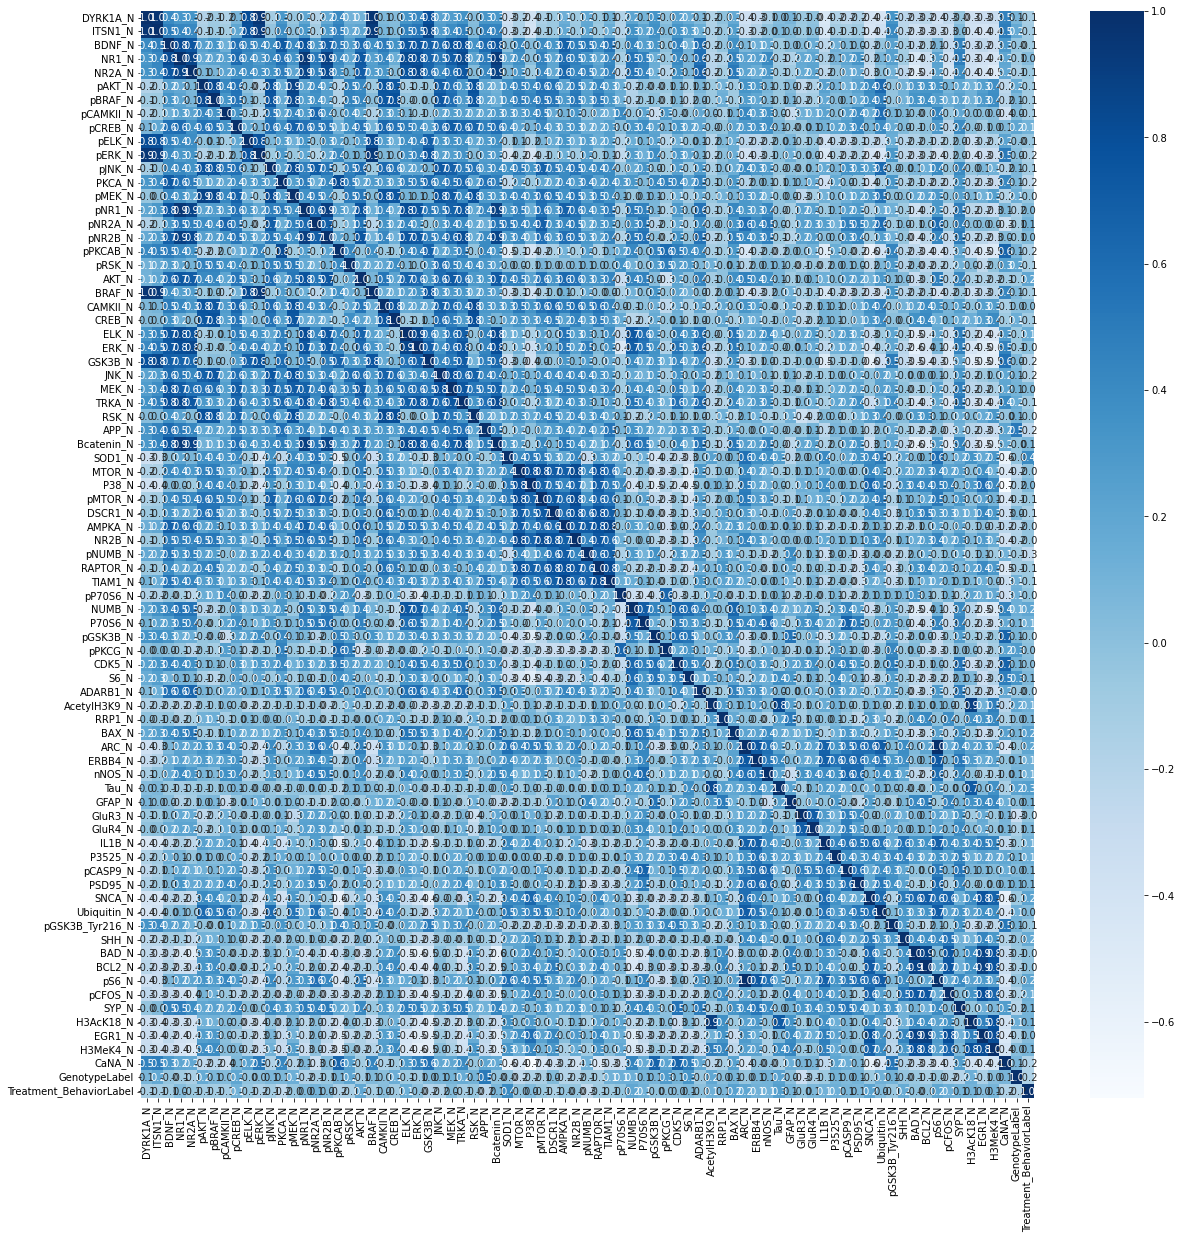

In [ ]:
correlation_matrix = mice_data.corr()
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

In [ ]:
#separating Xdata and YData based on the 4 classes
x_data = mice_data[mice_data.columns[0:len(mice_data.columns) -1 ]]  
y_data = mice_data[mice_data.columns[len(mice_data.columns)-1]]

Above we have made the X and Y data based on the other four classes apart from the binary classes and will use above data for the model 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x_data)

Here's I'm using the MinMaxScaler function which is normalizing with zero mean and 1 variance.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
#importing ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#I'm using the Logistic Regression model to see how the accuracies will vary by using this model for the four classes other than Binary

In [ ]:
model = LogisticRegression()
model.fit(x_scaled,y_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred1 = model.predict(x_scaled)

In [ ]:
training_data_accuracy1 = accuracy_score(y_data, y_pred1)  #Prediction with just x_data 

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy1)

Accuracy on Training data :  0.9829396325459318


So as we can see that from the Accuracy score, with the scaled data we have 98% accuracy which is best to say that is very nearly accurate using the Logistic Regression model 

#Now let us use Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_scaled,y_data)
y_pred2 = model2.predict(x_scaled)
training_data_accuracy2 = accuracy_score(y_data, y_pred2)  #Prediction with just x_data 

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy2)

Accuracy on Training data :  1.0


So as we can see that from the Accuracy score, with the scaled data we have 100% accuracy which is the best  using the Random Forest 

In [ ]:
from sklearn.metrics import f1_score              #using the F1 score as a metric
f1_score(y_data, y_pred2, average = 'micro')

1.0

In [ ]:
f1_score(y_data, y_pred2, average = 'weighted') #f1 score using the Random Forest model

1.0

As we can see it is yielding the same score as the accuracy

In [ ]:
f1_score(y_data, y_pred2, average = 'macro')

1.0

In [ ]:
f1_score(y_data, y_pred1, average = 'macro')    #f1 score using the Logistic regression model

0.9835113845436311

#Now using the Binary Classes


In [ ]:
X = mice_data.drop(columns='GenotypeLabel', axis=1)
Y = mice_data['GenotypeLabel']

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_scaled,Y)
y_pred3 = model3.predict(X_scaled)
training_data_accuracy3 = model3.score(X_scaled, Y)  #Prediction with just x_data which is scaled

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy3)

Accuracy on Training data :  1.0


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred3)

1.0

AS we are able to see roc_auc_score of 1 that means the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

So above we have used different metrics such as accuracy, F1 score, AUC, ROC_AUC etc. We have performed the two separate classification tasks – one is binary, the other has four classes. So as we can see for both the classification classes we can see that the Random Forest Classifier model is giving the accuracy which is nealr 100% from the above. Using the same model we got the roc_auc score also as 100%.


#Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)

In [ ]:
X = mice_data.drop(columns='GenotypeLabel', axis=1)
Y = mice_data['GenotypeLabel']
X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
model4.fit(x_scaled, y_data)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [ ]:
y_pred4 = model4.predict(x_scaled)
training_data_accuracy4 = accuracy_score(y_data, y_pred4)
print('Accuracy on Training data : ', training_data_accuracy4)

Accuracy on Training data :  1.0


In [ ]:
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
model4.fit(X_scaled, Y)
y_pred4 = model4.predict(X_scaled)
training_data_accuracy4 = accuracy_score(Y, y_pred4)
print('Accuracy on Training data : ', training_data_accuracy4)

Accuracy on Training data :  1.0


 For the above model using the Neural Network we can see that the accuracy is 100% similarly like the other models

MLPClassifier supports multi-class classification by applying Softmax as the output function.
Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample.
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# SVM (a few kernels, their hyper-parameters such as width, and slack penalty)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model = SVC()
model.fit(X_scaled,Y)
print('The accuracy on the training data is', model.score(X_scaled,Y))

The accuracy on the training data is 0.9986876640419947


As we can see from above, by using the SVM model we are getting 99% accuracy which is good. But we will use kernals and see how the accuracy varies

In [ ]:
kernel = ['linear','rbf','poly','sigmoid']
for i in kernel:
  model = SVC(kernel=i,C=1.0)
  model.fit(X_scaled,Y)
  print('For kernel:',i)
  print('The accuracy is:', model.score(X_scaled,Y))

For kernel: linear
The accuracy is: 0.979002624671916
For kernel: rbf
The accuracy is: 0.9986876640419947
For kernel: poly
The accuracy is: 1.0
For kernel: sigmoid
The accuracy is: 0.5721784776902887


As we can see that we have used different kernels as models SVM and C here is the penalty level which I have assigned as 1 as giving it high or low value can result in overfit and underfit as well. I have referred to this youtube video for reference. https://www.youtube.com/watch?v=b4qQzVPWkZQ
> As we can see that using the different levels fetch the different accuracy scores and shown but the most accurate one is the polynomial with 100% while the least one was sigmoid kernal with 57% accuracy. 



#Elastic net logistic regression (L1 and L2 weight)

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_scaled,y_data)
ypred = enet.predict(x_scaled)
print('The accuracy on the training data is', enet.score(x_scaled,ypred))

The accuracy on the training data is 1.0


So as we can see that from the Accuracy score, with the scaled data we have 100% accuracy which is the best using the Elastic Net.

#Feature Importance

In [ ]:
# Training on the entire data set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_scaled, Y)
ypred = model.predict(X_scaled)
print('The Accuracy is:', model.score(X_scaled, Y))

The Accuracy is: 0.952755905511811


Feature: 0, Score: 0.49060
Feature: 1, Score: 1.80073
Feature: 2, Score: -1.24803
Feature: 3, Score: -1.15992
Feature: 4, Score: -0.91814
Feature: 5, Score: 1.05025
Feature: 6, Score: -0.14730
Feature: 7, Score: -1.29950
Feature: 8, Score: 1.08800
Feature: 9, Score: -0.10753
Feature: 10, Score: -0.50958
Feature: 11, Score: 0.09036
Feature: 12, Score: -0.24066
Feature: 13, Score: 0.09565
Feature: 14, Score: -1.57408
Feature: 15, Score: -1.03540
Feature: 16, Score: 0.68360
Feature: 17, Score: -0.33870
Feature: 18, Score: -0.35152
Feature: 19, Score: -0.10917
Feature: 20, Score: -0.28787
Feature: 21, Score: -0.14914
Feature: 22, Score: 0.34597
Feature: 23, Score: -1.50369
Feature: 24, Score: -1.77874
Feature: 25, Score: -0.16419
Feature: 26, Score: -0.08946
Feature: 27, Score: 0.98187
Feature: 28, Score: 2.21032
Feature: 29, Score: -0.53763
Feature: 30, Score: 6.76608
Feature: 31, Score: -0.47616
Feature: 32, Score: 0.80199
Feature: 33, Score: -1.73788
Feature: 34, Score: -0.48802
Feature

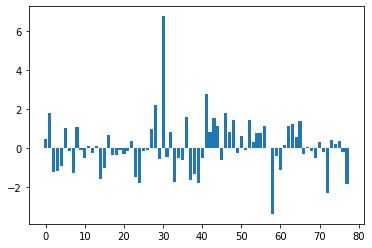

In [ ]:
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.
These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.
No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

Feature: 0, Score: 0.00455
Feature: 1, Score: 0.04160
Feature: 2, Score: 0.00471
Feature: 3, Score: 0.00646
Feature: 4, Score: 0.01017
Feature: 5, Score: 0.01086
Feature: 6, Score: 0.00155
Feature: 7, Score: 0.00482
Feature: 8, Score: 0.00212
Feature: 9, Score: 0.00273
Feature: 10, Score: 0.00330
Feature: 11, Score: 0.00272
Feature: 12, Score: 0.00429
Feature: 13, Score: 0.00151
Feature: 14, Score: 0.03325
Feature: 15, Score: 0.00485
Feature: 16, Score: 0.00264
Feature: 17, Score: 0.00419
Feature: 18, Score: 0.00288
Feature: 19, Score: 0.00438
Feature: 20, Score: 0.00237
Feature: 21, Score: 0.00540
Feature: 22, Score: 0.00439
Feature: 23, Score: 0.01602
Feature: 24, Score: 0.01107
Feature: 25, Score: 0.00446
Feature: 26, Score: 0.00325
Feature: 27, Score: 0.00113
Feature: 28, Score: 0.00477
Feature: 29, Score: 0.00328
Feature: 30, Score: 0.31961
Feature: 31, Score: 0.00152
Feature: 32, Score: 0.01270
Feature: 33, Score: 0.02509
Feature: 34, Score: 0.00310
Feature: 35, Score: 0.00962
Fe

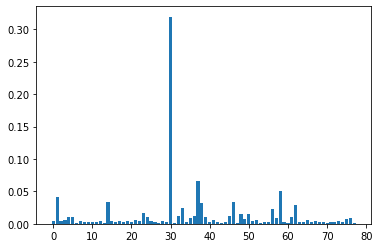

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled, Y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

By using the Random Forest Regressor, The results suggest that - 15 to 17 of the 79 features are being important to prediction. 

https://machinelearningmastery.com/calculate-feature-importance-with-python/
The above blog is used to understand the feature importance.

The accuracy on the training data is 0.979002624671916
Feature: 0, Score: 0.60328
Feature: 1, Score: 2.19596
Feature: 2, Score: -1.05131
Feature: 3, Score: -1.00405
Feature: 4, Score: -0.05404
Feature: 5, Score: 1.46205
Feature: 6, Score: -0.41112
Feature: 7, Score: -1.07854
Feature: 8, Score: 0.64488
Feature: 9, Score: -0.12483
Feature: 10, Score: -0.50030
Feature: 11, Score: -0.38881
Feature: 12, Score: 0.29921
Feature: 13, Score: -0.19805
Feature: 14, Score: -1.36100
Feature: 15, Score: -0.85014
Feature: 16, Score: 1.36510
Feature: 17, Score: -0.49606
Feature: 18, Score: -0.70677
Feature: 19, Score: 0.52790
Feature: 20, Score: -0.39728
Feature: 21, Score: 0.34782
Feature: 22, Score: -0.21610
Feature: 23, Score: -1.65311
Feature: 24, Score: -2.39687
Feature: 25, Score: -0.54703
Feature: 26, Score: -0.16082
Feature: 27, Score: 0.74368
Feature: 28, Score: 2.65088
Feature: 29, Score: -0.59552
Feature: 30, Score: 5.82290
Feature: 31, Score: -0.44603
Feature: 32, Score: 0.46675
Feature: 3

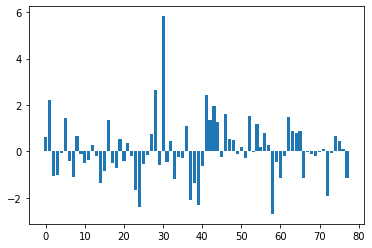

In [ ]:
model = SVC(kernel='linear')
model.fit(X_scaled,Y)
print('The accuracy on the training data is', model.score(X_scaled,Y))
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The above results is for the Support Vector Machines Model, which shows similar results as of the logistic regressors. The feature importance is as similar to SVC model feature importance.

As we can see that we have tried different models for analyzing the feature importance as shown above. The svc and the logistic regressor feature importance are very similar as shown in the results. The random forest regressor model shows the feature importance which are quite understandable. rather than the other model feature importance.

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

#Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1), n_features_to_select=15)
sel.fit(X_scaled,Y)
ypred = sel.predict(X_scaled)

In [ ]:
sel.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

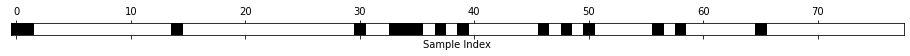

In [ ]:
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(())
plt.show()

As we have selected the 15 number of features using the RFE, the above plot shows the number of selected features. Now let us compare the model that has fitted all the features and the model that fits only 15 selected features as we selected.

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=15)
select.fit(X,Y)
X_train_selected = select.transform(X)

print("X_train.shape: {}".format(X.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (762, 78)
X_train_selected.shape: (762, 15)


In [ ]:
model = RandomForestClassifier()
model.fit(X_scaled,Y)
print("Scoree with all features: {:,.3f}".format(model.score(X,Y)))

model.fit(X_train_selected,Y)
print("Scoree with selected features: {:,.3f}".format(model.score(X_train_selected,Y)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Scoree with all features: 0.705
Scoree with selected features: 1.000


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, cv=30)
selector = selector.fit(X_scaled, Y)

In [ ]:
model = SVC()
model.fit(X_scaled,Y)
print("Score with all features: {:,.3f}".format(model.score(X_scaled,Y)))
print("Score with selected features: {:,.3f}".format(selector.score(X_scaled,Y)))

Score with all features: 0.999
Score with selected features: 0.975


As we can see that using the feature selection (RFE) for the Random Forest Model we selected the 15 features which are important and the accuracy improved by selecting the features are above from 60% to 99%.

While the RFECV feature selection for the SVC model we see a good accuracy but decrease in the accuracy to 97% which is still a good accuracy. So basically I think that modifying the features that we select can even increase the accuracy

##Testing promising Models for Test Data

In [ ]:
import urllib.request

with urllib.request.urlopen("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv") as url:
    test_data = pd.read_csv(url)

In [ ]:
test_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S


In [ ]:
test_data.tail()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C
224,0.257290,0.432628,0.289689,1.589289,2.125977,0.232704,0.177244,2.308557,0.181056,0.894797,...,0.172697,0.123290,0.163880,0.402706,0.245363,0.278048,0.326087,1.171785,Ts65Dn,Saline_S/C


In [ ]:
test_data.shape

(225, 79)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

Again same we have the object type data type in the last 2 columns and we have to convert that into categorical data

In [ ]:
#Loading the Label Encoder function
GenotypeLabel = LabelEncoder().fit_transform(test_data.Genotype)
Treatment_BehaviorLabel = LabelEncoder().fit_transform(test_data.Treatment_Behavior)

In [ ]:
#We are appending the Labels to the dataframe
test_data['GenotypeLabel'] = GenotypeLabel
test_data['Treatment_BehaviorLabel'] = Treatment_BehaviorLabel
test_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior,GenotypeLabel,Treatment_BehaviorLabel
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S,0,0
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S,0,0
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S,0,0
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S,0,0
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S,0,0


In [ ]:
test_data.drop(columns=['Genotype','Treatment_Behavior'], axis=1, inplace=True)
test_data.head() #Dataset after dropping the Oject data type columns after converting them to categorical data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,GenotypeLabel,Treatment_BehaviorLabel
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,0,0
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,0,0
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,0,0
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,0,0
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,0,0


In [ ]:
test_data.isna().sum()   #Knowimg the missing values

DYRK1A_N                    0
ITSN1_N                     0
BDNF_N                      0
NR1_N                       0
NR2A_N                      0
                           ..
EGR1_N                     15
H3MeK4_N                   90
CaNA_N                      0
GenotypeLabel               0
Treatment_BehaviorLabel     0
Length: 79, dtype: int64

In [ ]:
test_data = IterativeImputer().fit_transform(test_data)  #Here we are using the Multivariate Imputer to fill the missing values just like the train data

In [ ]:
test_data = pd.DataFrame(test_data, columns = cols)
test_data.isna().sum()

DYRK1A_N                   0
ITSN1_N                    0
BDNF_N                     0
NR1_N                      0
NR2A_N                     0
                          ..
EGR1_N                     0
H3MeK4_N                   0
CaNA_N                     0
GenotypeLabel              0
Treatment_BehaviorLabel    0
Length: 79, dtype: int64

In [ ]:
from sklearn import preprocessing
#separating Xdata and YData based on the 4 classes
xtest = test_data[test_data.columns[0:len(test_data.columns) -1 ]]  
ytest = test_data[test_data.columns[len(test_data.columns)-1]]
xtestscale = preprocessing.StandardScaler().fit_transform(xtest)
#Now using the Binary Classes
Xtest = test_data.drop(columns='GenotypeLabel', axis=1)
Ytest = test_data['GenotypeLabel']
Xtestscale = MinMaxScaler().fit_transform(Xtest)

Here I will be using the Random Forest model and the SVC model on the training data

In [ ]:
rfr = RandomForestClassifier()
rfr.fit(xtestscale,ytest)
ypredct = rfr.predict(xtestscale)

In [ ]:
print('Accuracy on Test data : ', rfr.score(xtestscale,ytest))

Accuracy on Test data :  1.0


In [ ]:
rfr1 = RandomForestClassifier()
rfr1.fit(Xtestscale,Ytest)
ypredt = rfr1.predict(Xtestscale)
print('Accuracy on Test data : ', rfr1.score(Xtestscale,Ytest))

Accuracy on Test data :  1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredct))         #for the one type of 4 class

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00      1.00        60
         3.0       1.00      1.00      1.00        45

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



In [ ]:
print(classification_report(Ytest,ypredt))  #for the one type of binary class

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       135
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



Here I have used the Random forest classifier model for the test data. So this model I used is giving the perfect accuracy of 1.0 which we can rely on this model

Now I will be running the Nueral Network model on the test data and see how the algorithm performs and how will be the metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',random_state=0)
clf.fit(xtestscale,ytest)

MLPClassifier(random_state=0, solver='lbfgs')

In [ ]:
clf.score(xtestscale,ytest)

1.0

In [ ]:
# Training on the entire data set
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression().fit(xtestscale, ytest)
ymod = mod.predict(xtestscale)
mod.score(xtestscale, ytest)

1.0

In [ ]:
from sklearn import metrics
error_score = metrics.r2_score(ytest,ymod) #we are using the R square error to find the different between the actual and predicted values
print("R Squared Error is ", error_score)

R Squared Error is  1.0


The most common interpretation of r-squared is how well the regression model fits the observed data. Generally, a higher r-squared indicates a better fit for the model. So we have 100% as value which indicates that it is the best fit model for the test data.

And we also can see all the different classification models we trained are almost perfect and are yielding same results for the test data also

#Observations and Thoughts

As we can see that we have performed various steps and the due diligence for successfully training a classification model. From the above tests on the test data we see that the accuracy is 100%. Since the accuracy is 100% with different models and the tests we conducted due to the due diligence we followed, we feel that this is a good methodology for the data we have.

But ther might be some small mistakes that can show the result or the accuracy score as 100%. But as we saw in different models like SVC we got 97% accuracy which indicates that the model is accurate enough for the train data and the test data provided.



*   We used the Label Encoder to convert the object type data types in the Genotype and treatment behaviour column into the categorical ones.
*   We found the different missing values in the different columns but we didn't dropped any column because there were lot of missing values and dropping it might cause some performance issue, so we used iterative imputer to fill the missing values which is the best among the different imputers we followed

*   We used contour plots and the box plots to understand the class imbalances. There were not much difference in comparision when we were doing and we continued with the useful variables selection using the correlation
*   We tried with different metrics like Accuracy, f1score, auc, etc and all but we used the accuracy score for all the models because the accuracy metric was performing good compared to the different metrics


*   We ran all the models that were mentioned in the assignement and all were giving good and accurate results but we chose the Logistic regression and the neural network model because their score were high compapred to the other models
*   We also tried the feature importance for the data and found that there were around 15 to 17 features tha were important and can be used. But as the models were accurate enough before the feature selection itself but with feature selection it was proves to be perfect model with 100% accuracy score.

*   At last we tried couple of models lilke Logistic regression and neural network as state before and the results for the models on the test data were as expected and were very good





We have learnt various methods and steps to train a machine learning model for the assignment through the help of various blogs and the youtube videos also

#References

We have mentioned the specific references link where ever used near the cell itself, these below references were used to understand and enhace our skill in ML

https://www.kaggle.com/nkitgupta/evaluation-metrics-for-multi-class-classification

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://scikit-learn.org/

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://machinelearningmastery.com/rfe-feature-selection-in-python/

https://www.youtube.com/c/Siddhardhan

